#  Content Monetization Modeler  
## YouTube Ad Revenue Prediction Using Machine Learning

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### 2. Load Dataset

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\KAVIYA V\Downloads\youtube_ad_revenue_dataset.csv")

# Preview data
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,category,device,country,ad_revenue_usd
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,Entertainment,TV,IN,203.178237
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,Gaming,Tablet,CA,140.880508
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,Education,TV,CA,360.134008
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,Entertainment,Mobile,UK,224.638261
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,Education,Mobile,CA,165.514388


### 3. Initial Data Exploration

In [3]:
# Shape
df.shape

# Column names
df.columns

# Dataset info
df.info()

# Missing values
df.isnull().sum()

# Data types
df.dtypes

# Statistical summary
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   video_id              122400 non-null  object 
 1   date                  122400 non-null  object 
 2   views                 122400 non-null  int64  
 3   likes                 116283 non-null  float64
 4   comments              116288 non-null  float64
 5   watch_time_minutes    116295 non-null  float64
 6   video_length_minutes  122400 non-null  float64
 7   subscribers           122400 non-null  int64  
 8   category              122400 non-null  object 
 9   device                122400 non-null  object 
 10  country               122400 non-null  object 
 11  ad_revenue_usd        122400 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 11.2+ MB


,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd
count,122400.000000,116283.000000,116288.000000,116295.000000,122400.000000,122400.000000,122400.000000
mean,9999.856283,1099.633618,274.396636,37543.827721,16.014165,502191.719902,252.727210
std,99.881260,519.424089,129.741739,12987.724246,8.083790,288397.470103,61.957052
min,9521.000000,195.000000,48.000000,14659.105562,2.000142,1005.000000,126.590603
25%,9933.000000,650.000000,162.000000,26366.320569,9.004695,252507.500000,199.902018
50%,10000.000000,1103.000000,274.000000,37531.990337,16.005906,503465.500000,252.749699
75%,10067.000000,1547.000000,387.000000,48777.782090,23.021260,752192.000000,305.597518
max,10468.000000,2061.000000,515.000000,61557.670089,29.999799,999997.000000,382.768254


### 4. Data Cleaning
#### 4.1 Remove Duplicates

In [4]:
# Check duplicates
df.duplicated().sum()

# Remove duplicates
before = len(df)
df.drop_duplicates(inplace=True)
print("Duplicates Removed:", before - len(df))

Duplicates Removed: 2400


#### 4.2 Handle Missing Values

In [5]:
df.isnull().sum()

video_id                   0
date                       0
views                      0
likes                   6000
comments                6000
watch_time_minutes      6000
video_length_minutes       0
subscribers                0
category                   0
device                     0
country                    0
ad_revenue_usd             0
dtype: int64

In [6]:
# likes & comments → 0
df[['likes', 'comments']] = df[['likes', 'comments']].fillna(0)

# watch_time_minutes → median
df['watch_time_minutes'] = df['watch_time_minutes'].fillna(
    df['watch_time_minutes'].median()
)

# views & subscribers → median (if any missing)
df['views'] = df['views'].fillna(df['views'].median())
df['subscribers'] = df['subscribers'].fillna(df['subscribers'].median())

# Final check
df.isnull().sum()

video_id                0
date                    0
views                   0
likes                   0
comments                0
watch_time_minutes      0
video_length_minutes    0
subscribers             0
category                0
device                  0
country                 0
ad_revenue_usd          0
dtype: int64

### 5. Date Processing & Time Features

In [7]:
# Check date column
df['date'].head()

# Convert to datetime
df['Date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract features
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.to_period('Q').astype(str)

# Remove time
df['Date'] = df['Date'].dt.date

# Verify
df[['Date', 'Year', 'Quarter']].head()

,Date,Year,Quarter
0,2024-09-24,2024,2024Q3
1,2024-09-22,2024,2024Q3
2,2024-11-21,2024,2024Q4
3,2025-01-28,2025,2025Q1
4,2025-04-28,2025,2025Q2


### 6. Exploratory Data Analysis (EDA)

#### 6.1 Time Trend

In [8]:
# Time trend
trend_df = df.groupby('Date')[['views','ad_revenue_usd']].sum().reset_index()
trend_df.head() 

,Date,views,ad_revenue_usd
0,2024-06-09,3371136,86792.136584
1,2024-06-10,3189709,80735.290329
2,2024-06-11,3390373,85152.787848
3,2024-06-12,3260005,82808.351046
4,2024-06-13,3228308,82065.660282


#### 6.2 Category Trend

In [9]:
# Category trend
category_trend = df.groupby('category')[['views','ad_revenue_usd']].mean().reset_index()
category_trend

,category,views,ad_revenue_usd
0,Education,9999.914078,252.564162
1,Entertainment,10000.106367,252.397546
2,Gaming,9999.773706,253.426887
3,Lifestyle,9999.808137,251.936934
4,Music,10000.379915,252.477374
5,Tech,9999.009986,253.458882


#### 6.3 device Trend

In [10]:
# Device trend
device_trend = df.groupby('device')['views'].sum().reset_index()
device_trend

,device,views
0,Desktop,299857961
1,Mobile,299895167
2,TV,300838647
3,Tablet,299388105


#### 6.4 Country Trend

In [11]:
# Country revenue trend
country_trend = (
    df.groupby('country')['ad_revenue_usd']
      .sum()
      .reset_index()
      .sort_values('ad_revenue_usd', ascending=False)
)
country_trend

,country,ad_revenue_usd
1,CA,5.106761e+06
2,DE,5.095423e+06
3,IN,5.089260e+06
0,AU,5.026759e+06
4,UK,5.024095e+06
5,US,4.983066e+06


### 7. Correlation Analysis

ad_revenue_usd          1.000000
watch_time_minutes      0.964052
likes                   0.128878
views                   0.037942
comments                0.028335
subscribers             0.005065
Year                    0.001053
video_length_minutes    0.000364
Name: ad_revenue_usd, dtype: float64


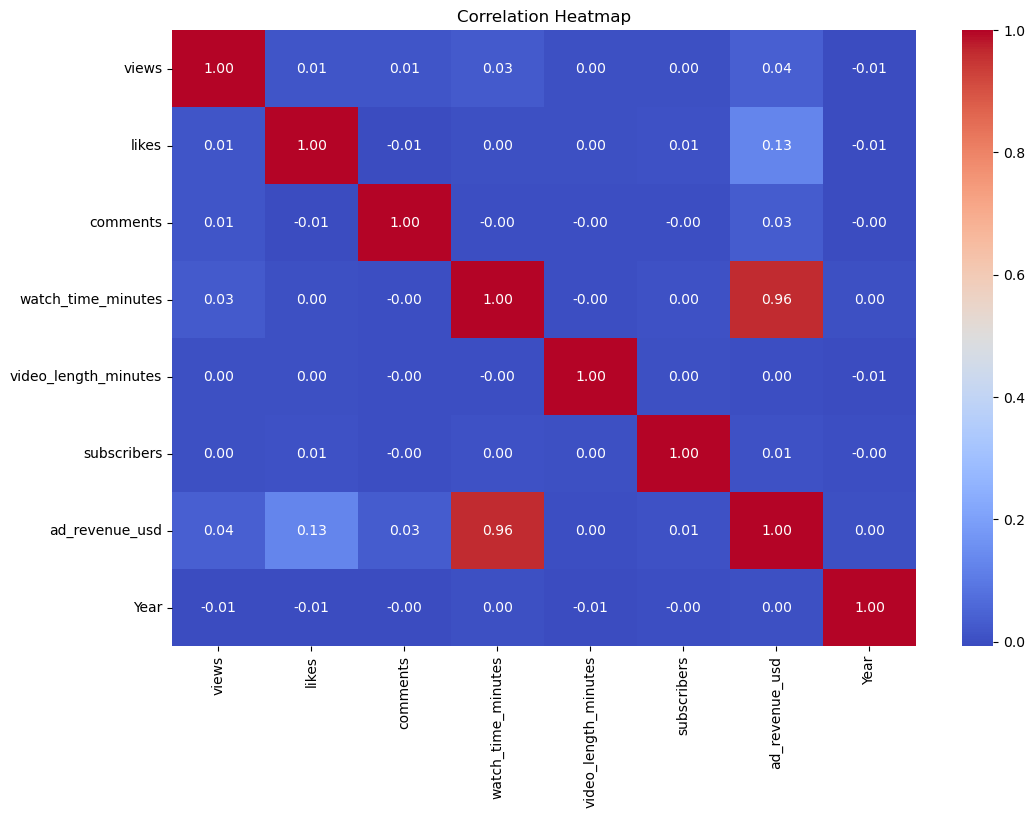

In [12]:
# Numeric columns only
df_numeric = df.select_dtypes(include='number')

# Correlation matrix
corr = df_numeric.corr()

# Correlation with target
print(corr['ad_revenue_usd'].sort_values(ascending=False))

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### 8. Outlier Detection

In [13]:
num_df = df.select_dtypes(include=np.number)

threshold = 3
z_scores = np.abs(stats.zscore(num_df))

print("Size before removing outliers:", df.shape)

outlier_rows = (z_scores > threshold).any(axis=1)

df_clean = df[~outlier_rows]
outlier_rows_df = df[outlier_rows]

print("Size after removing outliers:", df_clean.shape)
print("Outlier rows:", outlier_rows_df.shape)

# Replace original dataframe
df = df_clean.copy()

Size before removing outliers: (120000, 15)
Size after removing outliers: (119684, 15)
Outlier rows: (316, 15)


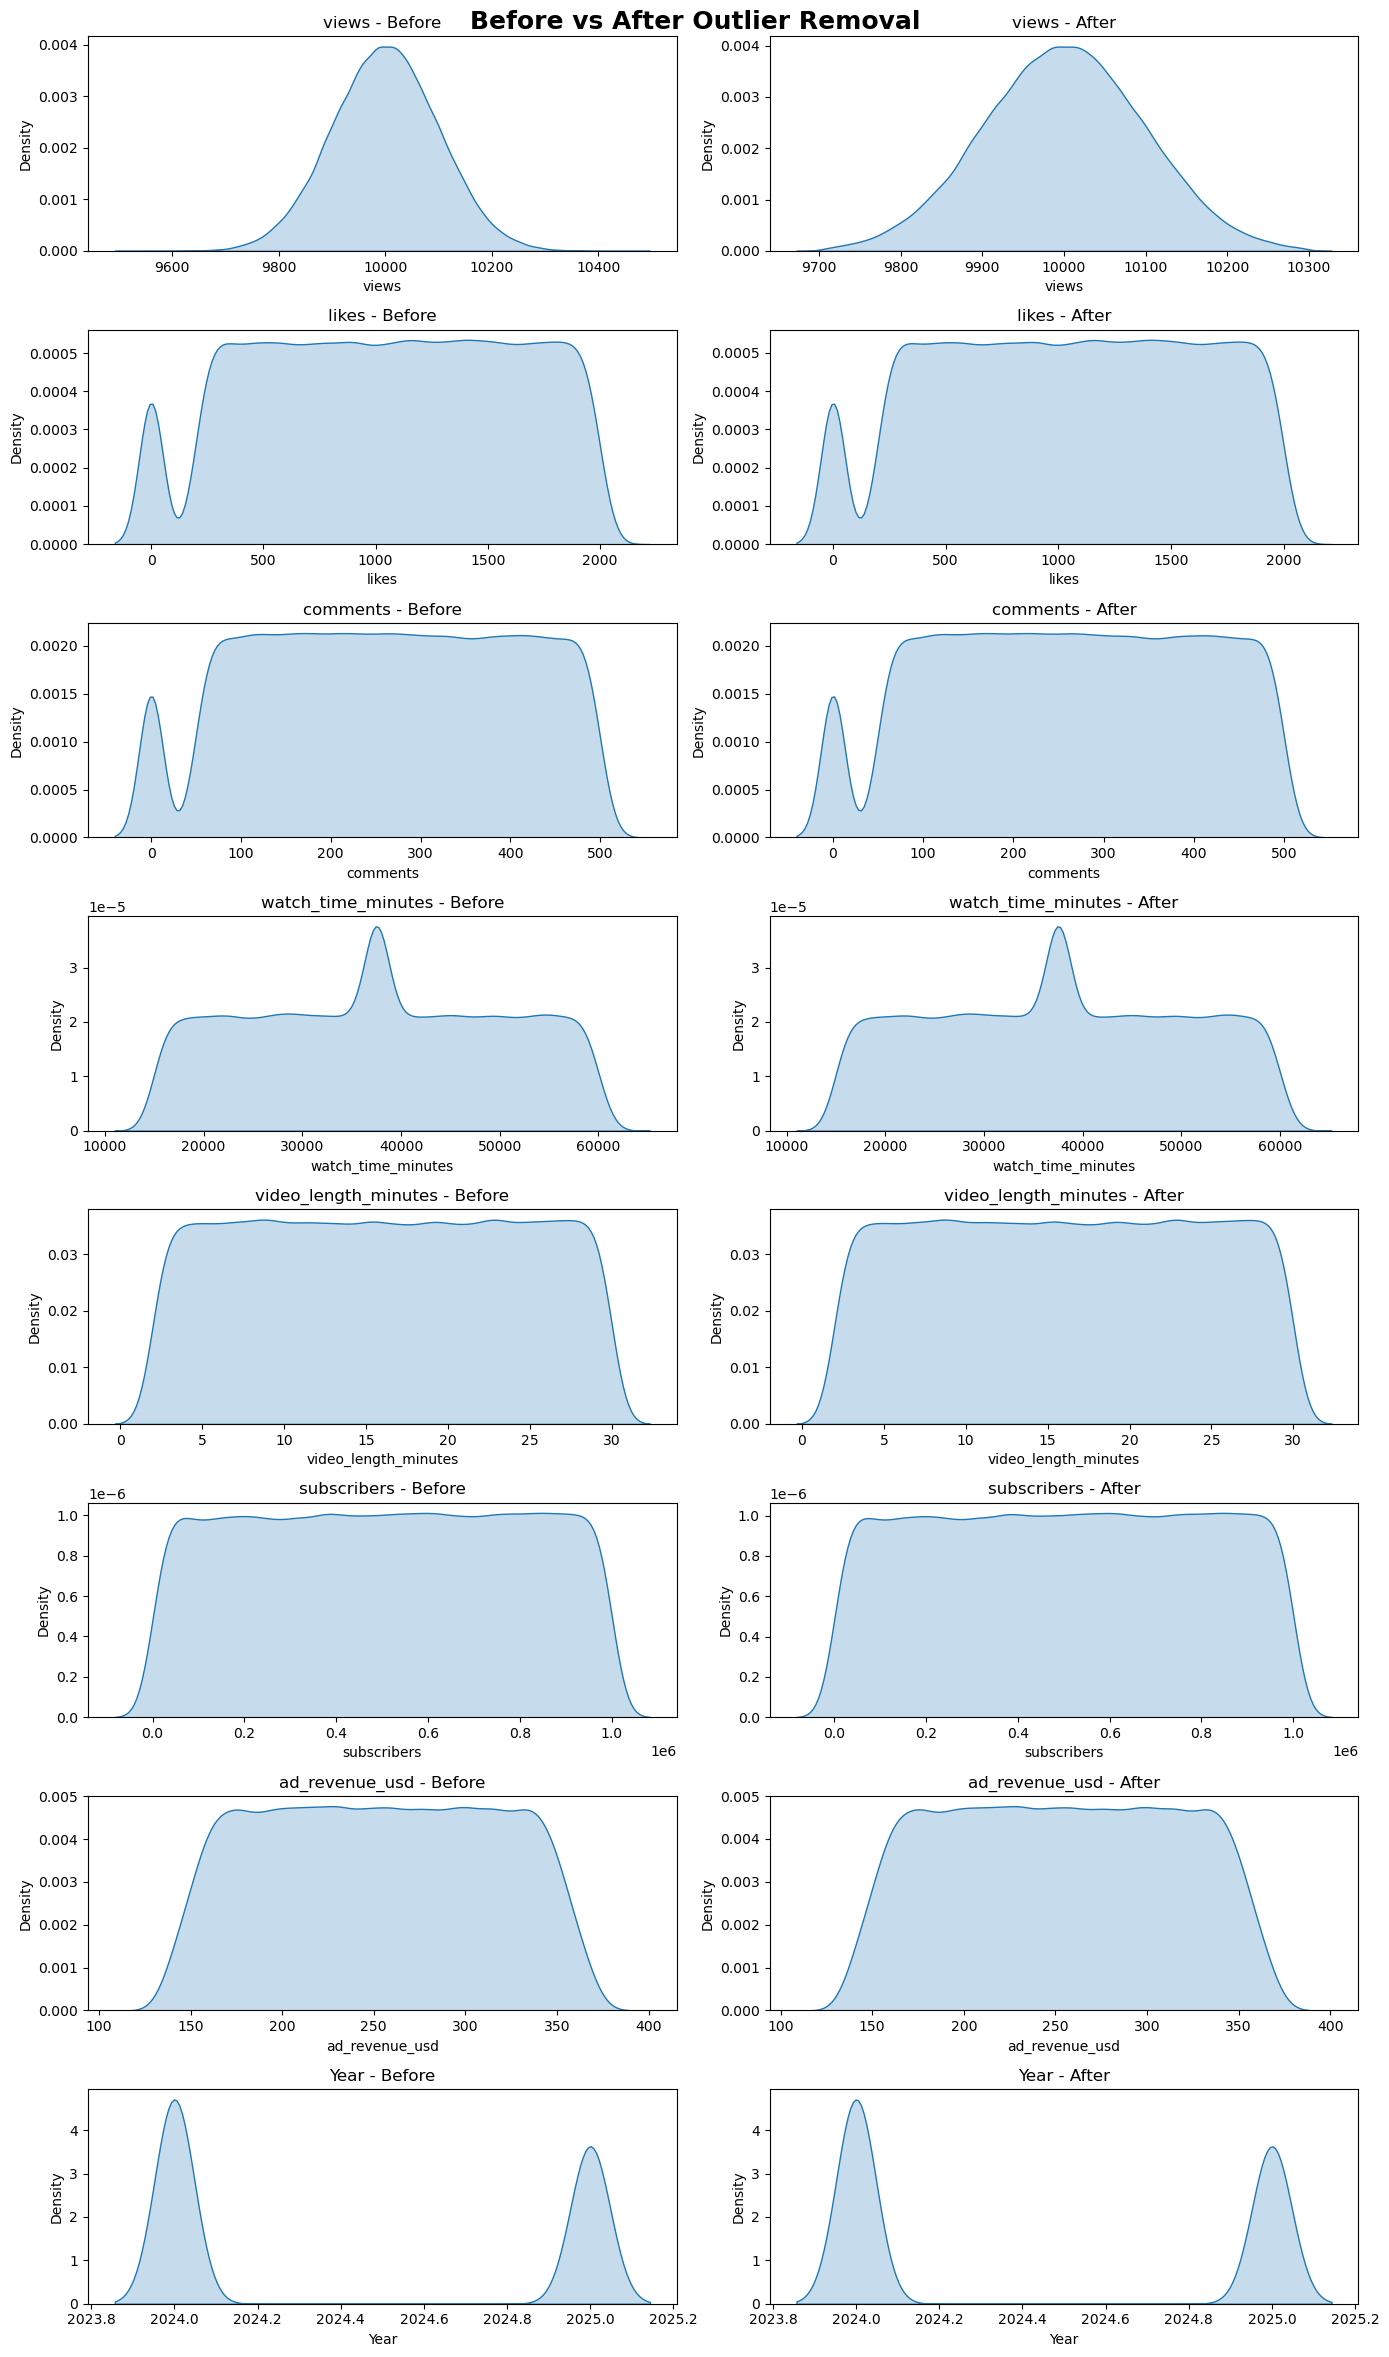

In [14]:
# Distribution Before & After

numeric_features = df.select_dtypes(include='number').columns
rows = len(numeric_features)

fig, axes = plt.subplots(rows, 2, figsize=(14, 3*rows))
fig.suptitle("Before vs After Outlier Removal", fontsize=18, fontweight="bold")

for i, col in enumerate(numeric_features):

    sns.kdeplot(x=num_df[col], ax=axes[i, 0], fill=True)
    axes[i, 0].set_title(f"{col} - Before")

    sns.kdeplot(x=df[col], ax=axes[i, 1], fill=True)
    axes[i, 1].set_title(f"{col} - After")

plt.tight_layout()
plt.show()

### 9. Target Variable Distribution

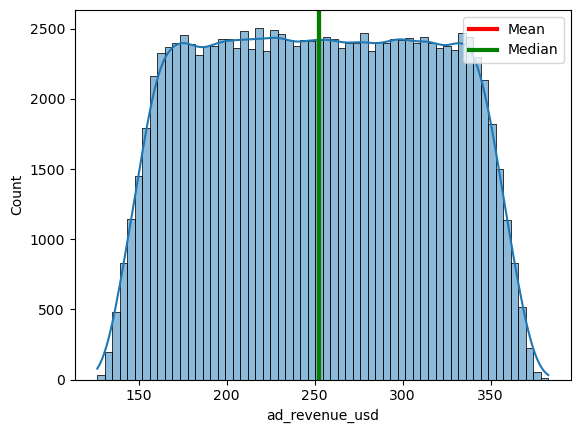

Skewness Value: 0.00 (Normal Distribution)


In [15]:
skew_value = df['ad_revenue_usd'].skew()

sns.histplot(df['ad_revenue_usd'], kde=True)
plt.axvline(df['ad_revenue_usd'].mean(), color='r', lw=3, label='Mean')
plt.axvline(df['ad_revenue_usd'].median(), color='g', lw=3, label='Median')
plt.legend()
plt.show()

res = ("Positive" if skew_value > 0.5 else 
       "Negative" if skew_value < -0.5 else 
       "Normal Distribution")

print(f"Skewness Value: {skew_value:.2f} ({res})")

In [16]:
df.columns

Index(['video_id', 'date', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'category', 'device', 'country',
       'ad_revenue_usd', 'Date', 'Year', 'Quarter'],
      dtype='object')

### 10. Encoding Categorical Variables

In [17]:
df = pd.get_dummies(df,
                    columns=['category', 'device', 'country'],
                    drop_first=True,
                    dtype=int)

In [18]:
df.head()

,video_id,date,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Date,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,2024-09-24 10:50:40.993199,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024-09-24,...,0,0,0,1,0,0,0,1,0,0
1,vid_3459,2024-09-22 10:50:40.993199,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024-09-22,...,0,0,0,0,1,1,0,0,0,0
2,vid_4784,2024-11-21 10:50:40.993199,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024-11-21,...,0,0,0,1,0,1,0,0,0,0
3,vid_4078,2025-01-28 10:50:40.993199,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025-01-28,...,0,0,1,0,0,0,0,0,1,0
4,vid_3522,2025-04-28 10:50:40.993199,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025-04-28,...,0,0,1,0,0,1,0,0,0,0


In [19]:
# Drop Unused Columns

df.drop(columns=['date'], inplace=True)

df.head()

,video_id,views,likes,comments,watch_time_minutes,video_length_minutes,subscribers,ad_revenue_usd,Date,Year,...,category_Music,category_Tech,device_Mobile,device_TV,device_Tablet,country_CA,country_DE,country_IN,country_UK,country_US
0,vid_3092,9936,1221.0,320.0,26497.214184,2.862137,228086,203.178237,2024-09-24,2024,...,0,0,0,1,0,0,0,1,0,0
1,vid_3459,10017,642.0,346.0,15209.747445,23.738069,736015,140.880508,2024-09-22,2024,...,0,0,0,0,1,1,0,0,0,0
2,vid_4784,10097,1979.0,187.0,57332.658498,26.200634,240534,360.134008,2024-11-21,2024,...,0,0,0,1,0,1,0,0,0,0
3,vid_4078,10034,1191.0,242.0,31334.517771,11.770340,434482,224.638261,2025-01-28,2025,...,0,0,1,0,0,0,0,0,1,0
4,vid_3522,9889,1858.0,477.0,15665.666434,6.635854,42030,165.514388,2025-04-28,2025,...,0,0,1,0,0,1,0,0,0,0


### 11. Feature Engineering

In [20]:
# Engagement rate
df['engagement_rate'] = (df['likes'] + df['comments']) / (df['views'] + 1)

# Likes per view
df['likes_per_view'] = df['likes'] / (df['views'] + 1)

# Comments per view
df['comments_per_view'] = df['comments'] / (df['views'] + 1)

# Watch time ratio
df['watch_time_ratio'] = df['watch_time_minutes'] / (df['video_length_minutes'] + 1)

In [21]:
df.columns

Index(['video_id', 'views', 'likes', 'comments', 'watch_time_minutes',
       'video_length_minutes', 'subscribers', 'ad_revenue_usd', 'Date', 'Year',
       'Quarter', 'category_Entertainment', 'category_Gaming',
       'category_Lifestyle', 'category_Music', 'category_Tech',
       'device_Mobile', 'device_TV', 'device_Tablet', 'country_CA',
       'country_DE', 'country_IN', 'country_UK', 'country_US',
       'engagement_rate', 'likes_per_view', 'comments_per_view',
       'watch_time_ratio'],
      dtype='object')

In [22]:
df.to_csv("youtube_cleaned_dataset.csv", index=False)

### 12. Train-Test Split & Scaling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['number']).drop('ad_revenue_usd', axis=1)
y = df['ad_revenue_usd']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train. shape, X_test.shape, y_train.shape, y_test. shape

((95747, 24), (23937, 24), (95747,), (23937,))

### 13. Model Building

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### 14. Model Evaluation

In [27]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = []


In [28]:
# Train, Predict, Evaluate

for name, model in models.items():

    # Use scaled data for linear models
    if name in ["Linear", "Ridge", "Lasso"]:
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)

    results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae
    })

    print(f"{name:16} | R2: {r2:.3f} | RMSE: {rmse:.2f} | MAE: {mae:.2f}")

Linear           | R2: 0.949 | RMSE: 14.06 | MAE: 4.85
Ridge            | R2: 0.949 | RMSE: 14.06 | MAE: 4.85
Lasso            | R2: 0.948 | RMSE: 14.15 | MAE: 5.56
RandomForest     | R2: 0.949 | RMSE: 14.09 | MAE: 3.63
GradientBoosting | R2: 0.952 | RMSE: 13.58 | MAE: 3.74


In [29]:
# Results Table
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
results_df

,Model,R2,RMSE,MAE
4,GradientBoosting,0.952425,13.576407,3.737975
1,Ridge,0.948986,14.058547,4.848405
0,Linear,0.948985,14.058624,4.848382
3,RandomForest,0.948724,14.094638,3.625764
2,Lasso,0.948310,14.151394,5.557657


### 15. Feature Importance

In [30]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

print("Final Best Model:", best_model_name)


Final Best Model: GradientBoosting


In [31]:
# Train best model again
best_model.fit(X_train, y_train)

# Feature importance
importances = best_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(10)

,Feature,Importance
3,watch_time_minutes,0.977874
20,engagement_rate,0.016990
1,likes,0.003038
21,likes_per_view,0.001504
0,views,0.000229
2,comments,0.000158
22,comments_per_view,0.000134
23,watch_time_ratio,0.000049
5,subscribers,0.000010
4,video_length_minutes,0.000008


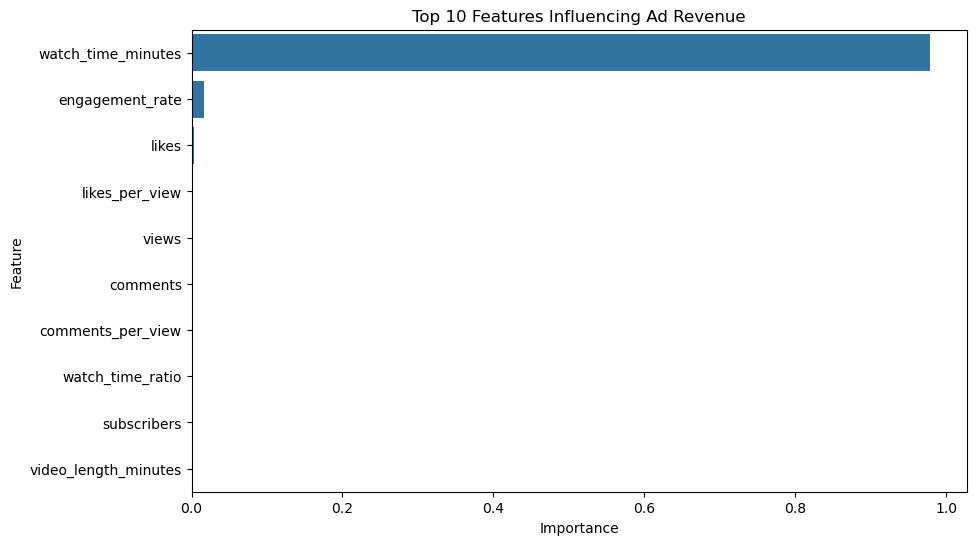

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=feature_importance_df.head(10),
    x='Importance',
    y='Feature'
)
plt.title("Top 10 Features Influencing Ad Revenue")
plt.show()

### 16. Save Model & Scaler

In [33]:
import joblib

joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")

joblib.dump(X_train.columns.tolist(), "feature_columns.pkl")

print("Model and scaler saved successfully")

Model and scaler saved successfully
